In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import LearningRateScheduler
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [2]:
def load_data(data_path):
    data=pd.read_csv(data_path)
    X = data.iloc[: ,:-1].to_numpy()
    Y = data['labels'].to_numpy()

    X = X.reshape(X.shape[0], X.shape[1], 1)
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
    x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

    return x_train, x_test, y_train, y_test

def create_compile_model():
    pass

In [23]:
x_train, x_test, y_train, y_test = load_data("../data/data_proccesed_50.csv")

In [4]:
def custom_scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return float(lr * tf.math.exp(-0.02))
scheduler = LearningRateScheduler(custom_scheduler)

normalizer = layers.Normalization()
normalizer.adapt(x_train)

In [24]:
model_lstm_50 = models.Sequential([
    layers.Input(shape=(x_train.shape[1], x_train.shape[2])), 
    normalizer,
    layers.LSTM(64, activation="tanh"),
    layers.Dropout(0.3),
    layers.Dense(1, activation="sigmoid"),
])

model_lstm_50.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

In [25]:
history_lstm_50=model_lstm_50.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test), callbacks=[scheduler])

Epoch 1/10
7174/7174 ━━━━━━━━━━━━━━━━━━━━ 67s 9ms/step - accuracy: 0.9801 - loss: 0.0664 - val_accuracy: 0.9920 - val_loss: 0.0382 - learning_rate: 0.0010
Epoch 2/10
7174/7174 ━━━━━━━━━━━━━━━━━━━━ 71s 10ms/step - accuracy: 0.9963 - loss: 0.0189 - val_accuracy: 0.9966 - val_loss: 0.0169 - learning_rate: 0.0010
Epoch 3/10
7174/7174 ━━━━━━━━━━━━━━━━━━━━ 71s 10ms/step - accuracy: 0.9979 - loss: 0.0116 - val_accuracy: 0.9983 - val_loss: 0.0077 - learning_rate: 0.0010
Epoch 4/10
7174/7174 ━━━━━━━━━━━━━━━━━━━━ 70s 10ms/step - accuracy: 0.9984 - loss: 0.0083 - val_accuracy: 0.9943 - val_loss: 0.0283 - learning_rate: 0.0010
Epoch 5/10
7174/7174 ━━━━━━━━━━━━━━━━━━━━ 71s 10ms/step - accuracy: 0.9980 - loss: 0.0094 - val_accuracy: 0.9990 - val_loss: 0.0048 - learning_rate: 0.0010
Epoch 6/10
7174/7174 ━━━━━━━━━━━━━━━━━━━━ 71s 10ms/step - accuracy: 0.9989 - loss: 0.0055 - val_accuracy: 0.9992 - val_loss: 0.0035 - learning_rate: 0.0010
Epoch 7/10
7174/7174 ━━━━━━━━━━━━━━━━━━━━ 71s 10ms/step - accurac

In [27]:
model_lstm_50.save(r"../model/model_50.h5")

In [11]:
x_train, x_test, y_train, y_test = load_data("../data/data_proccesed_100.csv")

In [14]:
model_lstm_100 = models.Sequential([
    layers.Input(shape=(x_train.shape[1], x_train.shape[2])), 
    normalizer,
    layers.LSTM(64, activation="tanh"),
    layers.Dropout(0.3),
    layers.Dense(1, activation="sigmoid"),
])

model_lstm_100.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

In [15]:
history_lstm_100=model_lstm_100.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test), callbacks=[scheduler])

Epoch 1/10
3587/3587 ━━━━━━━━━━━━━━━━━━━━ 64s 17ms/step - accuracy: 0.9757 - loss: 0.0904 - val_accuracy: 0.9922 - val_loss: 0.0429 - learning_rate: 0.0010
Epoch 2/10
3587/3587 ━━━━━━━━━━━━━━━━━━━━ 71s 20ms/step - accuracy: 0.9904 - loss: 0.0387 - val_accuracy: 0.9960 - val_loss: 0.0204 - learning_rate: 0.0010
Epoch 3/10
3587/3587 ━━━━━━━━━━━━━━━━━━━━ 60s 17ms/step - accuracy: 0.9955 - loss: 0.0216 - val_accuracy: 0.9975 - val_loss: 0.0143 - learning_rate: 0.0010
Epoch 4/10
3587/3587 ━━━━━━━━━━━━━━━━━━━━ 56s 16ms/step - accuracy: 0.9948 - loss: 0.0236 - val_accuracy: 0.9962 - val_loss: 0.0175 - learning_rate: 0.0010
Epoch 5/10
3587/3587 ━━━━━━━━━━━━━━━━━━━━ 57s 16ms/step - accuracy: 0.9929 - loss: 0.0311 - val_accuracy: 0.9951 - val_loss: 0.0172 - learning_rate: 0.0010
Epoch 6/10
3587/3587 ━━━━━━━━━━━━━━━━━━━━ 65s 18ms/step - accuracy: 0.9970 - loss: 0.0144 - val_accuracy: 0.9956 - val_loss: 0.0249 - learning_rate: 0.0010
Epoch 7/10
3587/3587 ━━━━━━━━━━━━━━━━━━━━ 70s 20ms/step - accura

In [17]:
model_lstm_100.save(r"../model/model_100.h5")

In [18]:
x_train, x_test, y_train, y_test = load_data("../data/data_proccesed_200.csv")

In [19]:
model_lstm_200 = models.Sequential([
    layers.Input(shape=(x_train.shape[1], x_train.shape[2])), 
    normalizer,
    layers.LSTM(64, activation="tanh"),
    layers.Dropout(0.3),
    layers.Dense(1, activation="sigmoid"),
])

model_lstm_200.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

In [20]:
history_lstm_200=model_lstm_200.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test), callbacks=[scheduler])

Epoch 1/10
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 67s 37ms/step - accuracy: 0.9097 - loss: 0.2709 - val_accuracy: 0.9941 - val_loss: 0.0331 - learning_rate: 0.0010
Epoch 2/10
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 58s 32ms/step - accuracy: 0.9894 - loss: 0.0523 - val_accuracy: 0.9429 - val_loss: 0.2060 - learning_rate: 0.0010
Epoch 3/10
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 58s 32ms/step - accuracy: 0.9620 - loss: 0.1477 - val_accuracy: 0.9951 - val_loss: 0.0221 - learning_rate: 0.0010
Epoch 4/10
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 58s 32ms/step - accuracy: 0.9939 - loss: 0.0308 - val_accuracy: 0.9976 - val_loss: 0.0138 - learning_rate: 0.0010
Epoch 5/10
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 59s 33ms/step - accuracy: 0.9661 - loss: 0.0898 - val_accuracy: 0.9708 - val_loss: 0.0842 - learning_rate: 0.0010
Epoch 6/10
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 60s 33ms/step - accuracy: 0.9515 - loss: 0.1422 - val_accuracy: 0.9515 - val_loss: 0.1347 - learning_rate: 0.0010
Epoch 7/10
1794/1794 ━━━━━━━━━━━━━━━━━━━━ 59s 33ms/step - accura

In [22]:
model_lstm_200.save(r"../model/model_200.h5")

In [28]:
model_lstm_50.evaluate(x_test,y_test)

3587/3587 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9996 - loss: 0.0023


[0.0027703111991286278, 0.9995033740997314]

In [21]:
model_lstm_100.evaluate(x_test,y_test)

897/897 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9994 - loss: 6.0840e-04


[0.0008357480983249843, 0.9991635680198669]

In [10]:
model_lstm_200.evaluate(x_test,y_test)

897/897 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9654 - loss: 0.0253


[0.025209417566657066, 0.9657419919967651]

In [13]:
def custom_scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return float(lr * tf.math.exp(-0.02))
scheduler = LearningRateScheduler(custom_scheduler)

normalizer = layers.Normalization()
normalizer.adapt(x_train)

model_cnn = models.Sequential([
    layers.Input(shape=(x_train.shape[1], x_train.shape[2])), 
    normalizer,
    layers.Conv1D(64, 1, activation="relu"),
    # layers.MaxPooling1D(pool_size=2),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(1, activation="sigmoid"),
])

model_cnn.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

In [14]:
history_cnn=model_cnn.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test), callbacks=[scheduler])

Epoch 1/10
7174/7174 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9589 - loss: 0.1543 - val_accuracy: 0.9755 - val_loss: 0.1279 - learning_rate: 0.0010
Epoch 2/10
7174/7174 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9741 - loss: 0.1275 - val_accuracy: 0.9762 - val_loss: 0.1199 - learning_rate: 0.0010
Epoch 3/10
7174/7174 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9742 - loss: 0.1208 - val_accuracy: 0.9760 - val_loss: 0.1162 - learning_rate: 0.0010
Epoch 4/10
7174/7174 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9735 - loss: 0.1189 - val_accuracy: 0.9747 - val_loss: 0.1151 - learning_rate: 0.0010
Epoch 5/10
7174/7174 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9732 - loss: 0.1167 - val_accuracy: 0.9735 - val_loss: 0.1137 - learning_rate: 0.0010
Epoch 6/10
7174/7174 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9732 - loss: 0.1160 - val_accuracy: 0.9768 - val_loss: 0.1145 - learning_rate: 0.0010
Epoch 7/10
7174/7174 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9736 - l

In [5]:
model_lstm_50 = tf.keras.models.load_model('../model/model_50.h5')
model_lstm_100 = tf.keras.models.load_model('../model/model_100.h5')
model_lstm_200 = tf.keras.models.load_model('../model/model_200.h5')

In [8]:
def plot_confusion_matrix(model, x_test, y_test):
    pred = model.predict(x_test)
    y_pred = (pred > 0.5).astype('int32')
    y_true = y_test

    conf_matrix = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(6, 4))
    color = sns.color_palette("rocket")
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap=color, cbar=True)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

3587/3587 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step


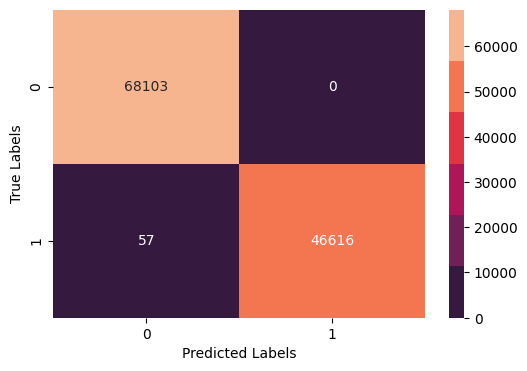

In [26]:
plot_confusion_matrix(model_lstm_50, x_test, y_test)

1794/1794 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step


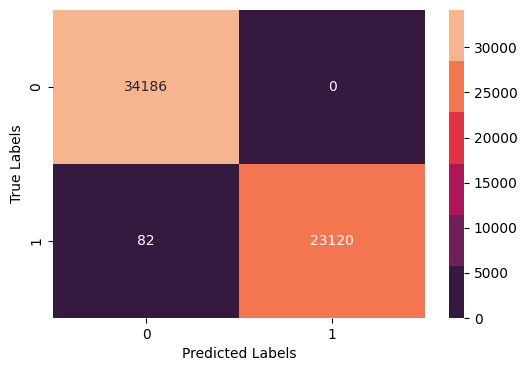

In [16]:
plot_confusion_matrix(model_lstm_100, x_test, y_test)

897/897 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step


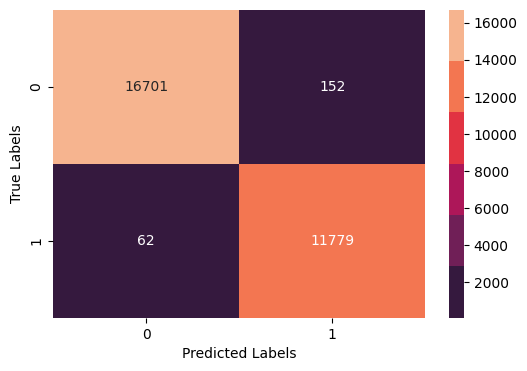

In [21]:
plot_confusion_matrix(model_lstm_200, x_test, y_test)

3587/3587 ━━━━━━━━━━━━━━━━━━━━ 2s 456us/step


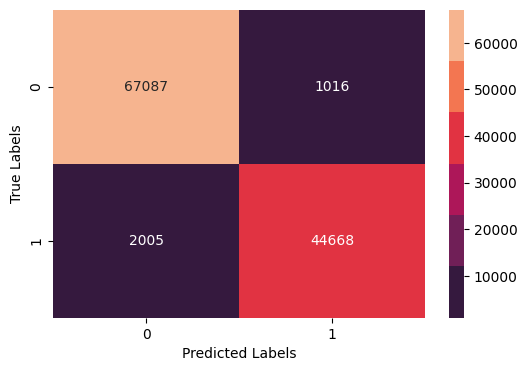

In [15]:
plot_confusion_matrix(model_cnn, x_test, y_test)